In [1]:
#Importing Modules
from sklearn import datasets, svm, linear_model
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
digits = datasets.load_digits()

In [22]:
#splitting the dataset
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np

#creating feature and target arrays
X=digits.data
y=digits.target

#split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42, stratify=y)

In [23]:
print(digits.data.shape)

(1797, 64)


<Figure size 432x288 with 0 Axes>

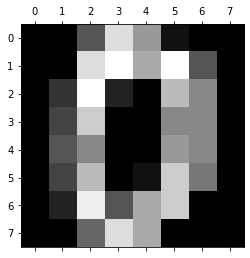

In [24]:
plt.gray()
plt.matshow(digits.images[0])
plt.show()

# K-Nearest Neighbor

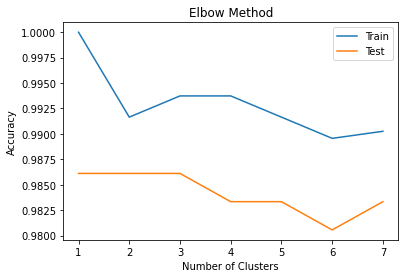

In [32]:
seed = 0
elbow_train = dict()
elbow_test = dict()

for k in range (1,8):
    estimator = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
    pred_y_train = estimator.predict(X_train)
    score_train = accuracy_score(y_train, pred_y_train)
    elbow_train[k]= score_train
    
    pred_y_test = estimator.predict(X_test)
    score_test = accuracy_score(y_test, pred_y_test)
    elbow_test[k]= score_test
    
elbow_df = pd.DataFrame([elbow_train,elbow_test], index=["Train","Test"]).T

ax = elbow_df.plot(title = 'Elbow Method')
#ax = elbow_df_test.plot
ax.set_xlabel("Number of Clusters")
ax.set_ylabel("Accuracy")
#plt.plot(3, elbow_df[3], 'ro')
accuracy_knn = elbow_df.iloc[2,1]

In [28]:
#Import Linear Regression
from sklearn.linear_model import LinearRegression

# create linear regression classifier
lr = LinearRegression(normalize=True)

# Fit the classifier with training data
lr.fit(X_train, y_train)

#print the accuracy
print("Accuracy: {0}".format(lr.score(X_test, y_test)))

Accuracy: 0.5573604101255051


In [29]:
#Performing SVM
from sklearn.svm import SVC
from sklearn import metrics
# create SVM
svm = SVC(kernel='linear')

#Fit the training data
svm.fit(X_train, y_train)
predicted = svm.predict(X_test)
print("Classification report for classifier %s:\n%s\n"
      % (svm, metrics.classification_report(y_test, predicted)))


Classification report for classifier SVC(kernel='linear'):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.92      0.94      0.93        36
           2       1.00      1.00      1.00        35
           3       1.00      0.97      0.99        37
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        37
           6       1.00      0.97      0.99        36
           7       0.97      1.00      0.99        36
           8       0.94      0.89      0.91        35
           9       0.95      1.00      0.97        36

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360




# Naive Bayes

Accuracy: 0.8111111111111111


Text(0.5, 42.0, 'Predicted label')

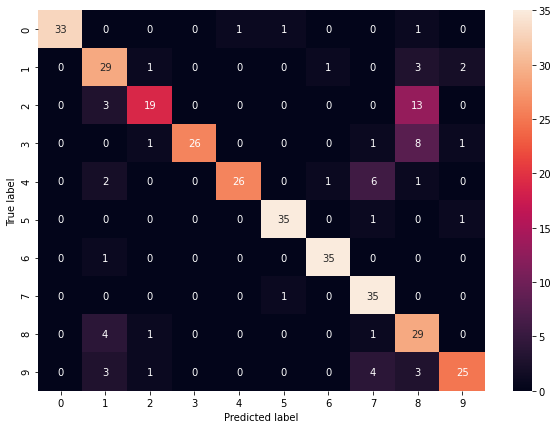

In [30]:
#from sklearn.naive_bayes import GaussianNB

# init the model
bayes = GaussianNB()

# Fit with the training data
bayes.fit(X_train, y_train)
# print the result
print("Accuracy: {0}".format(bayes.score(X_test, y_test)))

#confusion matrix
from sklearn.metrics import confusion_matrix
#import seaborn as sns
predicted = bayes.predict(X_test)
plt.figure(figsize=(10,7))
cm = confusion_matrix(y_test, predicted)
ax = sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Evaluation

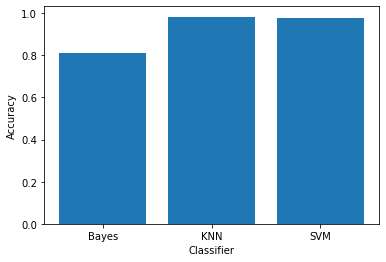

In [35]:
# Compare the accuracy of different classifiers in the same plot.
# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)
knn_acc = knn.score(X_test, y_test)
lr_acc  = lr.score(X_test, y_test)
svm_acc = svm.score(X_test, y_test)
bayes_acc = bayes.score(X_test, y_test)

x = ["Bayes", "KNN", "SVM"]
y = [bayes_acc, knn_acc, svm_acc]

plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.bar(x, y, align='center') 
plt.show()

# Regression
LinearRegression

In [27]:
gapminder = pd.read_csv('gapminder.csv')

<AxesSubplot:>

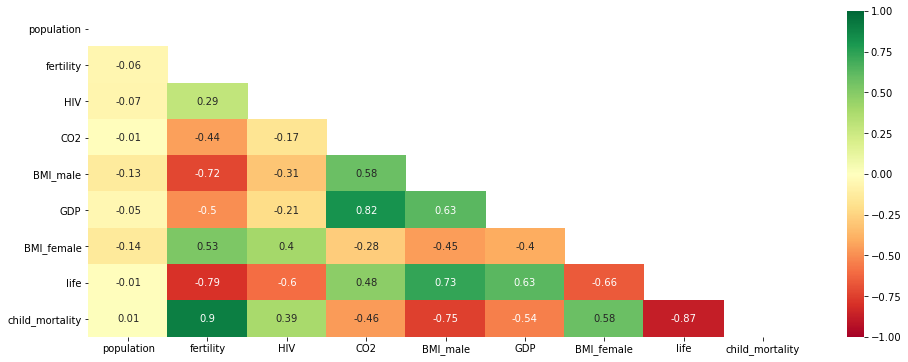

In [10]:
corr_gap = gapminder.corr()

plt.figure(figsize=(16,6))

mask = np.triu(np.ones_like(corr_gap, dtype=bool))
sns.heatmap(corr_gap.round(2), annot=True, mask=mask, cmap='RdYlGn', vmin=-1, vmax=1)

<AxesSubplot:>

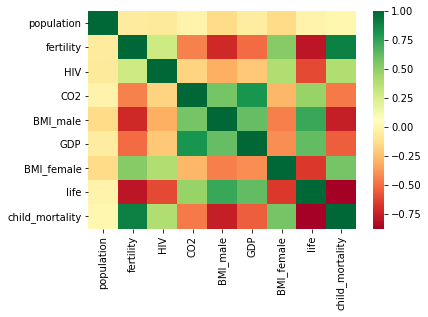

In [11]:
sns.heatmap(corr_gap, 
        xticklabels=corr_gap.columns,
        yticklabels=corr_gap.columns, cmap='RdYlGn')

In [12]:
gapminder.head(10)

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059,2.73,0.10,3.328945,24.59620,12314,129.9049,75.3,29.5,Middle East & North Africa
1,19842251,6.43,2.00,1.474353,22.25083,7103,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860,2.24,0.50,4.785170,27.50170,14646,118.8915,75.5,15.4,America
3,2975029,1.40,0.10,1.804106,25.35542,7383,132.8108,72.5,20.0,Europe & Central Asia
4,21370348,1.96,0.10,18.016313,27.56373,41312,117.3755,81.5,5.2,East Asia & Pacific
5,8331465,1.41,0.30,8.183160,26.46741,43952,124.1394,80.4,4.6,Europe & Central Asia
6,8868713,1.99,0.10,5.109538,25.65117,14365,128.6024,70.6,43.3,Europe & Central Asia
7,348587,1.89,3.10,3.131921,27.24594,24373,124.3862,72.2,14.5,America
8,148252473,2.38,0.06,0.319161,20.39742,2265,125.0307,68.4,55.9,South Asia
9,277315,1.83,1.30,6.008279,26.38439,16075,126.3940,75.3,15.4,America


In [40]:
x_single = gapminder['fertility'].values.reshape(-1,1)
y=gapminder['life']
regr_single = linear_model.LinearRegression()
regr_single.fit(x_single,y)
y_pred = regr_single.predict(x_single)
print("Score using fertility: ", regr_single.score(x_single,y))


Score using fertility:  0.6192442167740037


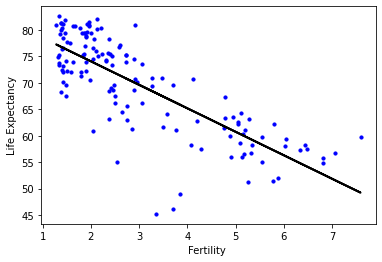

In [42]:
plt.scatter(x_single,y, color='blue', s=10)
plt.plot(x_single, y_pred, color='black', linewidth=2)

plt.ylabel('Life Expectancy')
plt.xlabel('Fertility ')

#plt.xticks(())
#plt.yticks(())

plt.show()

In [15]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   population       139 non-null    int64  
 1   fertility        139 non-null    float64
 2   HIV              139 non-null    float64
 3   CO2              139 non-null    float64
 4   BMI_male         139 non-null    float64
 5   GDP              139 non-null    int64  
 6   BMI_female       139 non-null    float64
 7   life             139 non-null    float64
 8   child_mortality  139 non-null    float64
 9   Region           139 non-null    object 
dtypes: float64(7), int64(2), object(1)
memory usage: 11.0+ KB


In [16]:
gapminder['Region'] = gapminder['Region'].astype(str)
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   population       139 non-null    int64  
 1   fertility        139 non-null    float64
 2   HIV              139 non-null    float64
 3   CO2              139 non-null    float64
 4   BMI_male         139 non-null    float64
 5   GDP              139 non-null    int64  
 6   BMI_female       139 non-null    float64
 7   life             139 non-null    float64
 8   child_mortality  139 non-null    float64
 9   Region           139 non-null    object 
dtypes: float64(7), int64(2), object(1)
memory usage: 11.0+ KB


In [17]:
x_all_features = gapminder[gapminder.columns.difference(['life','Region'])].values


In [18]:
regr_all_features = linear_model.LinearRegression()
regr_all_features.fit(x_all_features, y)
y_pred_all = regr_all_features.predict(x_all_features)
print("Score using all featues: ", regr_all_features.score(x_all_features,y))

Score using all featues:  0.8978171883856773


In [43]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
lasso = linear_model.Lasso()
cv = cross_val_score(lasso, x_all_features,y, cv=5)
print(cv)


[0.81911826 0.82562498 0.89203298 0.79822099 0.92791992]


In [44]:
# Print the average 5-fold cross-validation score
print("Average 5-Fold CV Score: {}".format(np.mean(cv)))

Average 5-Fold CV Score: 0.852583427751123


In [46]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
lasso = linear_model.Lasso()
cv2=cross_val_score(lasso, x_single,y, cv=5)
print(cv2)

[0.73245002 0.72095177 0.5418946  0.56135638 0.51811813]


In [47]:
# Print the average 5-fold cross-validation score
print("Average 5-Fold CV Score: {}".format(np.mean(cv2)))

Average 5-Fold CV Score: 0.6149541800846187


# Logistic Regression

In [49]:
cc = pd.read_csv('creditcard.csv')
cc.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [56]:
frauds = cc.loc[cc['Class'] == 1]
no_frauds = cc.loc[cc['Class'] == 0]
print("Frauds: ",len(frauds))
print("No Frauds:",len(no_frauds))

Frauds:  492
No Frauds: 284315


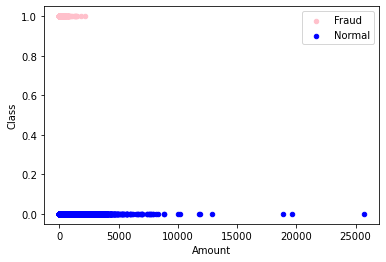

In [58]:
#Comparing frauds and no Frauds
ax = frauds.plot.scatter(x='Amount', y='Class', color='Pink', label='Fraud')
no_frauds.plot.scatter(x='Amount', y='Class', color='Blue', label='Normal', ax=ax)
plt.show()

In [59]:
#Logistic Regression
X = cc.iloc[:,:-1]
y = cc['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)

In [60]:
logistic = linear_model.LogisticRegression()
logistic.fit(X_train, y_train)
print("Accuracy: ", logistic.score(X_test, y_test))

Accuracy:  0.9989566927159095


C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0.5, 42.0, 'Predicted label')

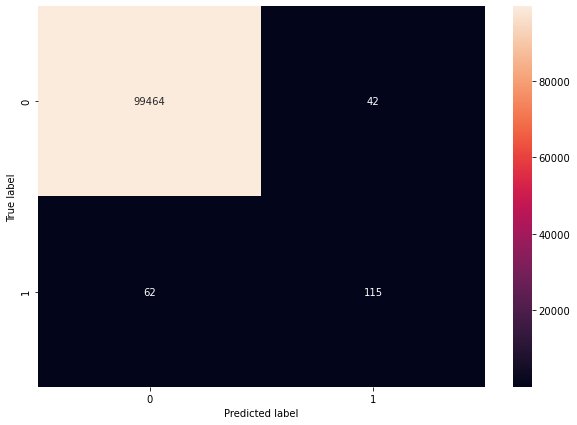

In [66]:
y_predicted = logistic.predict(X_test)
plt.figure(figsize=(10,7))
cm = confusion_matrix(y_test, y_predicted)
ax = sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label')